In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as pyplot 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [2]:
#load Diabetes dataset

Diabetes = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Voting Classifier\diabetes.csv", header=0)
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Display the shape of the dataset

Diabetes.shape

(768, 9)

In [4]:
# Copy the file as back-up

Diabetes_bk = Diabetes.copy()

In [5]:
# Display missing values in variable

Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Display unique values of variables

Diabetes.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
# Display dataset information 

Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Identify the Independent and Target variables

IndepVar = []
for col in Diabetes.columns:
    if col != 'Outcome':
        IndepVar.append(col)

TargetVar = 'Outcome'

x = Diabetes[IndepVar]
y = Diabetes[TargetVar]

In [9]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42) 

In [10]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [11]:
# Load the result dataset for KNN

Voting_results = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Voting Classifier\DiabetesVotingresults.csv", header=0)
Voting_results.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Classification models ranked top 3 models

Model Name:  LogisticRegression(random_state=42)
Confusion matrix : 
 [[ 45  35]
 [ 19 132]]
Outcome values : 
 45 35 19 132
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.56      0.62        80
           0       0.79      0.87      0.83       151

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

Accuracy : 76.6 %
Precision : 70.3 %
Recall : 56.2 %
F1 Score : 0.625
Specificity or True Negative Rate : 87.4 %
Balanced Accuracy : 71.8 %
MCC : 0.464
roc_auc_score: 0.718


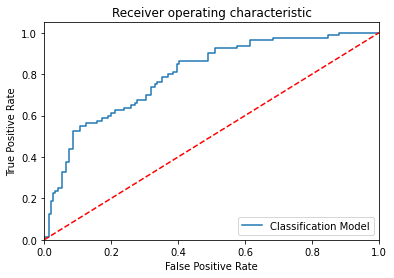

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier(random_state=42)
Confusion matrix : 
 [[ 40  40]
 [ 17 134]]
Outcome values : 
 40 40 17 134
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.50      0.58        80
           0       0.77      0.89      0.82       151

    accuracy                           0.75       231
   macro avg       0.74      0.69      0.70       231
weighted avg       0.75      0.75      0.74       231

Accuracy : 75.3 %
Precision : 70.2 %
Recall : 50.0 %
F1 Score : 0.584
Specificity or True Negative Rate : 88.7 %
Balanced Accuracy : 69.4 %
MCC : 0.428
roc_auc_score: 0.694


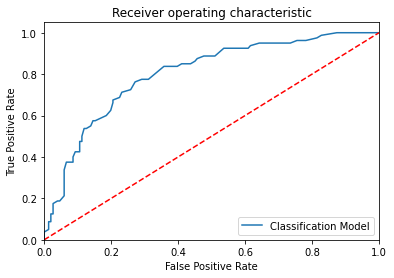

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True, random_state=42)
Confusion matrix : 
 [[ 41  39]
 [ 17 134]]
Outcome values : 
 41 39 17 134
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.51      0.59        80
           0       0.77      0.89      0.83       151

    accuracy                           0.76       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231

Accuracy : 75.8 %
Precision : 70.7 %
Recall : 51.2 %
F1 Score : 0.594
Specificity or True Negative Rate : 88.7 %
Balanced Accuracy : 70.0 %
MCC : 0.439
roc_auc_score: 0.7


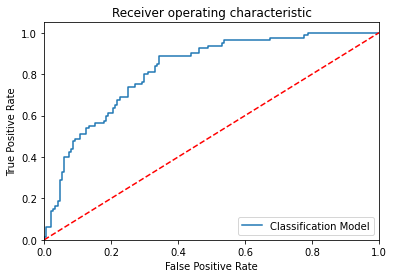

-----------------------------------------------------------------------------------------------------


In [12]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression(solver="lbfgs", random_state=42)
ModelRF = RandomForestClassifier(n_estimators=100, random_state=42)
ModelSVM = SVC(gamma="scale", random_state=42, probability=True)


# Evalution matrix for all the algorithms

MM = [ModelLR, ModelRF, ModelSVM]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    pyplot.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    pyplot.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    pyplot.plot([0, 1], [0, 1],'r--')
    pyplot.xlim([0.0, 1.0])
    pyplot.ylim([0.0, 1.05])
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.title('Receiver operating characteristic')
    pyplot.legend(loc="lower right")
    pyplot.savefig('Log_ROC')
    pyplot.show()
    #-------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    Voting_results = Voting_results.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------
    print('-----------------------------------------------------------------------------------------------------')

In [13]:
# Display the results

Voting_results.head(10)

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(random_state=42),0.766,0.703,0.562,0.625,0.874,0.464,0.718336,0.718
1,"(DecisionTreeClassifier(max_features='auto', r...",0.753,0.702,0.5,0.584,0.887,0.428,0.693709,0.694
2,"SVC(probability=True, random_state=42)",0.758,0.707,0.512,0.594,0.887,0.439,0.699959,0.7


# Voting Classifier

Confusion matrix : 
 [[ 46  34]
 [ 19 132]]
Outcome values : 
 46 34 19 132
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.57      0.63        80
           0       0.80      0.87      0.83       151

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

Accuracy : 77.1 %
Precision : 70.8 %
Recall : 57.5 %
F1 Score : 0.634
Balanced Accuracy : 72.4 %
MCC : 0.475
roc_auc_score: 0.811


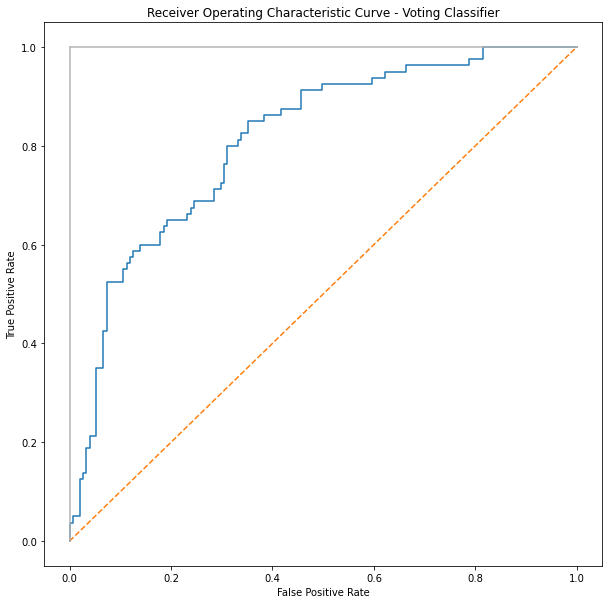

In [14]:
# Voting classifier is a model

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Model object for other models used in the solution

modelLR = LogisticRegression(solver="lbfgs", random_state=42)
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)
modelSVC = SVC(gamma="scale", random_state=42, probability=True)

# Model for Voting classifier

modelVOT = VotingClassifier(estimators=[('lr', modelLR), ('rf', modelRF), ('svc', modelSVC)], 
                            voting='soft', weights=[1, 1, 1])

# Fit or Train the model with train data

modelVOT.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelVOT.predict(x_test)

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n',matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3)
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = modelVOT.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score:', round(roc_auc_score(y_test, y_score1), 3))

#-------------------------------------------------------------------------------------
new_row = {'Model Name' : modelVOT,
           'Accuracy' : accuracy,
           'Precision' : precision,
           'Recall' : sensitivity,
           'F1 Score' : f1Score,
           'Specificity' : specificity,
           'MCC':MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy':balanced_accuracy}
Voting_results = Voting_results.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------

# Plot the Receiver Operating Characteristic(RoC) curve

pyplot.subplots(1, figsize=(10,10))
pyplot.title('Receiver Operating Characteristic Curve - Voting Classifier')
pyplot.plot(false_positive_rate1, true_positive_rate1)
pyplot.plot([0, 1], ls="--")
pyplot.plot([0, 0], [1, 0] , c=".7"), pyplot.plot([1, 1] , c=".7")
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.show()

# The AUC value lies between 0.5 to 1 where 0.5 denotes a bad classifer and 1 denotes an excellent classifier

In [15]:
# Display the results

Voting_results.head(20)

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(random_state=42),0.766,0.703,0.562,0.625,0.874,0.464,0.718336,0.718
1,"(DecisionTreeClassifier(max_features='auto', r...",0.753,0.702,0.5,0.584,0.887,0.428,0.693709,0.694
2,"SVC(probability=True, random_state=42)",0.758,0.707,0.512,0.594,0.887,0.439,0.699959,0.7
3,"VotingClassifier(estimators=[('lr', LogisticRe...",0.771,0.708,0.575,0.634,0.874,0.475,0.724586,0.724


In [17]:
# Write the file

Voting_results.to_csv("C:/Users/Admin/Downloads/Raju Sir DLS/Voting Classifier/DiabetesVotingresults-New.csv")